<a href="https://colab.research.google.com/github/Bosy-Ayman/DataGovernance/blob/main/Phase2_(cleaning%2Cvalidation%2Cencryption).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

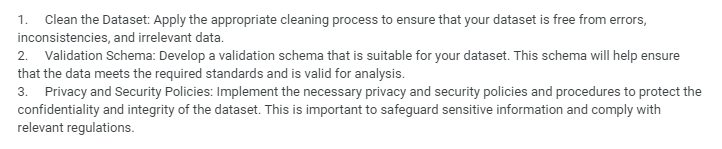

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('/content/googleplaystore.csv')

In [23]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [26]:
#identify duplicate rows
df.duplicated().sum()

483

In [27]:
#identify duplicate rows
duplicate = df[df.duplicated()]
duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [28]:
missing_values_count = df.isnull().sum()

missing_values_count[:]

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#Clean Data

**Fill missing values**

In [29]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True)
df['Rating']

0        4.100000
1        3.900000
2        4.700000
3        4.500000
4        4.300000
           ...   
10836    4.500000
10837    5.000000
10838    4.193338
10839    4.500000
10840    4.500000
Name: Rating, Length: 10841, dtype: float64

In [40]:
missing_values_count = df.isnull().sum()

missing_values_count[:]

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [44]:
df['Android Ver'].fillna('NA',inplace=True)


In [46]:
df['Current Ver'].fillna('NA',inplace=True)

In [105]:
average_rating = df["Rating"].mean()
df.at[10472, "Rating"] = round(average_rating, 1)

In [47]:
missing_values_count = df.isnull().sum()

missing_values_count[:]

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

**Drop duplicates**

In [41]:
df.drop_duplicates(inplace = True)

In [43]:
df.duplicated().sum()

0

In [52]:
df.dropna(inplace = True)

In [53]:
missing_values_count = df.isnull().sum()

missing_values_count[:]

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [64]:
df.Price=df.Price.apply(lambda x: x.strip('$'))


In [69]:
df.Installs=df.Installs.apply(lambda x: x.strip('+'))
df.Installs=df.Installs.apply(lambda x: x.replace(',',''))
df.Installs=df.Installs.replace('Free',np.nan)
df.Installs.value_counts()

Installs
1000000       1488
10000000      1132
100000        1129
10000         1033
1000           890
100            710
5000000        683
500000         517
50000          474
5000           469
10             385
100000000      369
500            328
50000000       272
50             204
5               82
1               67
500000000       61
1000000000      49
0               14
Name: count, dtype: int64

In [106]:
df['Installs'] = df['Installs'].astype(float).astype('Int64')

install_counts = df['Installs'].value_counts()
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.193338,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500000,398307,19M,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [82]:
# Remove currency symbols and any other non-numeric characters
df['Price'] = df['Price'].str.replace('[^\d.]', '', regex=True)

# Convert the Price column to float
df['Price'] = df['Price'].astype(float)

# Convert float to int (assuming you want to remove decimal places)
df['Price'] = df['Price'].astype(int)

# Check the data type and non-null counts after transformation
print(df.info())


AttributeError: Can only use .str accessor with string values!

In [111]:
df['Reviews'] = df['Reviews'].str.replace('[^\d.]', '', regex=True)

df['Reviews'] = df['Reviews'].astype(float)

df['Reviews'] = df['Reviews'].astype(int)

print(df.info())


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [84]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10356 non-null  object 
 1   Category        10356 non-null  object 
 2   Rating          10356 non-null  float64
 3   Reviews         10356 non-null  object 
 4   Size            10356 non-null  object 
 5   Installs        10356 non-null  Int64  
 6   Type            10356 non-null  object 
 7   Price           10356 non-null  int64  
 8   Content Rating  10356 non-null  object 
 9   Genres          10356 non-null  object 
 10  Last Updated    10356 non-null  object 
 11  Current Ver     10356 non-null  object 
 12  Android Ver     10356 non-null  object 
dtypes: Int64(1), float64(1), int64(1), object(10)
memory usage: 1.4+ MB


# Validation

In [55]:
!pip install pandera
import pandera as pa
import pandas as pd
from pandera import Column, DataFrameSchema, Check, Index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 6.1 MB/s eta 0:00:00


In [109]:
from numpy import float64

schema = pa.DataFrameSchema(
    {
        "Installs": Column(int),
        "Price": Column(int,Check.in_range(0, 100)),  #assuption
        "Rating": Column(float,Check(lambda x: 0.000 < x < 5.00))

    },
    # unique=["Id"],
)

validated_df = schema(df)
print(validated_df)

SchemaError: non-nullable series 'Installs' contains null values:
10472    <NA>
Name: Installs, dtype: Int64

In [110]:
try:
    schema.validate(df, lazy=True)
except pa.errors.SchemaErrors as exc:
    failure_cases_df = exc.failure_cases
    display(exc.failure_cases)

,schema_context,column,check,check_number,failure_case,index
0,Column,Installs,not_nullable,None,NaN,10472
1,Column,Price,not_nullable,None,NaN,10472
22,Column,Price,"in_range(0, 100)",0,399.0,9934
21,Column,Price,"in_range(0, 100)",0,394.0,9917
20,Column,Price,"in_range(0, 100)",0,200.0,9719
19,Column,Price,"in_range(0, 100)",0,154.0,6692
18,Column,Price,"in_range(0, 100)",0,109.0,6624
17,Column,Price,"in_range(0, 100)",0,399.0,5373
16,Column,Price,"in_range(0, 100)",0,399.0,5369
15,Column,Price,"in_range(0, 100)",0,389.0,5366


In [ ]:
!pip install pandera[io]

import pandera as pa
from pandera import Column, DataFrameSchema, Check, Index
inferred_schema = pa.infer_schema(df).to_script()


In [92]:
print(inferred_schema)

from pandera import DataFrameSchema, Column, Check, Index, MultiIndex

schema = DataFrameSchema(
    columns={
        "App": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "Category": Column(
            dtype="object",
            checks=None,
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex=False,
            description=None,
            title=None,
        ),
        "Rating": Column(
            dtype="float64",
            checks=[
                Check.greater_than_or_equal_to(min_value=1.0),
                Check.less_than_or_equal_to(max_value=5.0),
            ],
            nullable=False,
            unique=False,
            coerce=False,
            required=True,
            regex

#Using Great Expectation


In [ ]:
!pip install great_expectations
import great_expectations as gx


In [113]:
context = gx.get_context()


INFO:great_expectations.data_context.types.base:Created temporary directory '/tmp/tmp4m7tk6ix' for ephemeral docs site


In [114]:
validator = context.sources.pandas_default.read_csv("/content/googleplaystore.csv")

In [115]:
validator.expect_column_values_to_not_be_null('Category')

  warnings.warn(



Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "expectation_config": {
    "expectation_type": "expect_column_values_to_not_be_null",
    "kwargs": {
      "column": "Category",
      "batch_id": "default_pandas_datasource-#ephemeral_pandas_asset"
    },
    "meta": {}
  },
  "result": {
    "element_count": 10841,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [119]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#Privacy Policy

In [128]:
from cryptography.fernet import Fernet

key = Fernet.generate_key()

cipher = Fernet(key)

columns_to_encrypt = ['Size', 'Price', 'Last Updated']
for column in columns_to_encrypt:
    df[f'Encrypted_{column}'] = df[column].apply(lambda x: cipher.encrypt(str(x).encode()).decode())

print(df[['Size', 'Encrypted_Size', 'Price', 'Encrypted_Price', 'Last Updated', 'Encrypted_Last Updated']])

                     Size                                     Encrypted_Size  \
0                     19M  gAAAAABmO0Uzc4HvWmrWdS01msFeURdV1srH_gUvHRPxfn...   
1                     14M  gAAAAABmO0Uz4OHFHDW9BX3_dS4Okxkdxx5I6KJLgOrz7-...   
2                    8.7M  gAAAAABmO0UzGjuhTPurYKfalVthCZR_DsPcb50GkAGVWl...   
3                     25M  gAAAAABmO0UzRjEOJcO3EySDrt4jsUNaVC48zIXtLYyRNp...   
4                    2.8M  gAAAAABmO0Uzx5rkrGOd46bVnPndQpk2Zq4TituqSiuVoD...   
...                   ...                                                ...   
10837                3.6M  gAAAAABmO0Uz034w3Go68HyzxMr6ynZAaRtLjS81Dvlhut...   
10838                9.5M  gAAAAABmO0UzNDW6HqMBjSMeh_5Hrn7y2QtOW7p5x0v6EA...   
10839  Varies with device  gAAAAABmO0UzeN7PvsWou5L8WEzW3meBoaalTuOvLuE8CQ...   
10840                 19M  gAAAAABmO0UzbmqUduadgc4uv1HD7SKogjh5gCMjjt5Ty1...   
10472                 NaN  gAAAAABmO0UzxFe1Nek3HfdhtykF26iU1mOWtis0InItAT...   

       Price                           